### Exploring Time Series Data – Energy Consumption Forecasting

**Objective**: Parse and structure time series data for analysis and future forecasting. In this lesson, we’ll:
- Load the dataset
- Parse and set the datetime index
- Visualize the signal
- Check for and fill gaps in the timeline

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/energy.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

df.head()

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [42]:
# Parse datetime column
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Check result
print(df.index)

# Count duplicated timestamps
duplicates = df.index.duplicated().sum()
print(f"Number of duplicated timestamps: {duplicates}")

# View duplicates
df[df.index.duplicated(keep=False)].sort_index().head(10)

df = df.groupby(df.index).mean()

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121275, freq=None)
Number of duplicated timestamps: 4


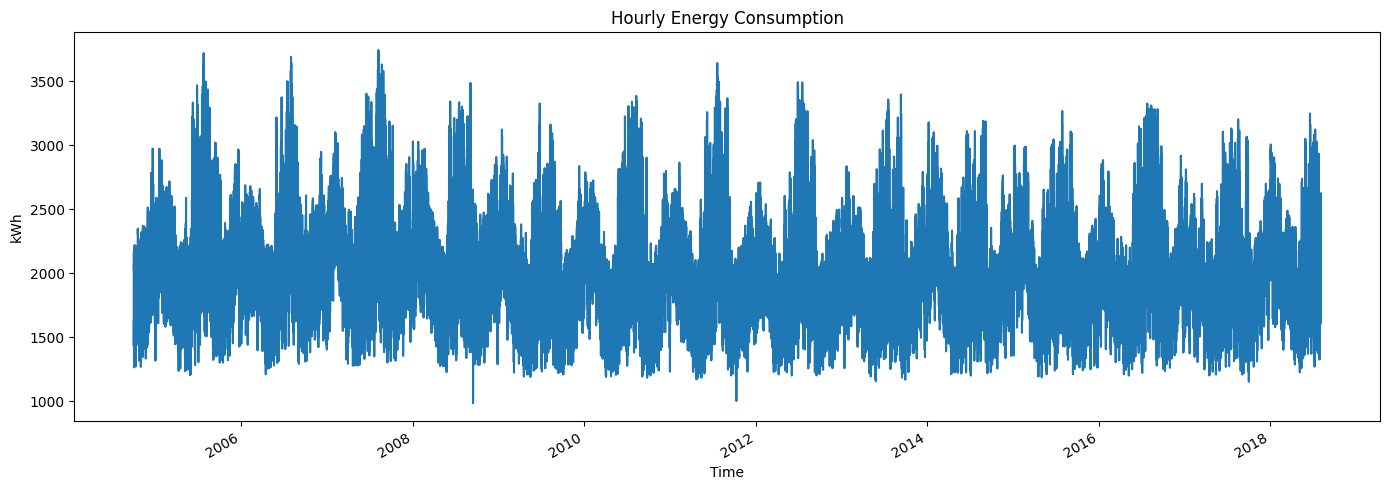

In [43]:
plt.figure(figsize=(14, 5))
df['DAYTON_MW'].plot()
plt.title("Hourly Energy Consumption")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.tight_layout()
plt.show()

In [44]:
# Reindex to expected full range
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')
df = df.reindex(full_index)

# Check missing
missing = df['DAYTON_MW'].isnull().sum()
print(f"Missing timestamps: {missing}")

Missing timestamps: 25


In [45]:
# Interpolate missing values (time-based)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# Confirm no missing values remain
df.isnull().sum()

DAYTON_MW    0
dtype: int64

### Temporal Feature Engineering – Lags, Windows, and Date Decomposition

In [46]:
df['lag_1'] = df['DAYTON_MW'].shift(1)      # 1 hour ago
df['lag_24'] = df['DAYTON_MW'].shift(24)    # 1 day ago
df['lag_168'] = df['DAYTON_MW'].shift(168)  # 1 week ago (24*7)

In [47]:
df['rolling_3'] = df['DAYTON_MW'].rolling(window=3).mean()        # past 3 hours
df['rolling_24'] = df['DAYTON_MW'].rolling(window=24).mean()      # daily rolling avg
df['rolling_std_24'] = df['DAYTON_MW'].rolling(window=24).std()   # daily std deviation

In [48]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek  # 0=Monday
df['month'] = df.index.month
df['is_weekend'] = df.index.dayofweek >= 5

In [49]:
df.head(150)

,DAYTON_MW,lag_1,lag_24,lag_168,rolling_3,rolling_24,rolling_std_24,hour,dayofweek,month,is_weekend
2004-10-01 01:00:00,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,10,False
2004-10-01 02:00:00,1536.0,1621.0,NaN,NaN,NaN,NaN,NaN,2,4,10,False
2004-10-01 03:00:00,1500.0,1536.0,NaN,NaN,1552.333333,NaN,NaN,3,4,10,False
2004-10-01 04:00:00,1434.0,1500.0,NaN,NaN,1490.000000,NaN,NaN,4,4,10,False
2004-10-01 05:00:00,1489.0,1434.0,NaN,NaN,1474.333333,NaN,NaN,5,4,10,False
2004-10-01 06:00:00,1620.0,1489.0,NaN,NaN,1514.333333,NaN,NaN,6,4,10,False
2004-10-01 07:00:00,1859.0,1620.0,NaN,NaN,1656.000000,NaN,NaN,7,4,10,False
2004-10-01 08:00:00,2007.0,1859.0,NaN,NaN,1828.666667,NaN,NaN,8,4,10,False
2004-10-01 09:00:00,2025.0,2007.0,NaN,NaN,1963.666667,NaN,NaN,9,4,10,False
2004-10-01 10:00:00,2067.0,2025.0,NaN,NaN,2033.000000,NaN,NaN,10,4,10,False


In [50]:
df.dropna(inplace=True)

In [51]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121128 entries, 2004-10-08 01:00:00 to 2018-08-03 00:00:00
Freq: h
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DAYTON_MW       121128 non-null  float64
 1   lag_1           121128 non-null  float64
 2   lag_24          121128 non-null  float64
 3   lag_168         121128 non-null  float64
 4   rolling_3       121128 non-null  float64
 5   rolling_24      121128 non-null  float64
 6   rolling_std_24  121128 non-null  float64
 7   hour            121128 non-null  int32  
 8   dayofweek       121128 non-null  int32  
 9   month           121128 non-null  int32  
 10  is_weekend      121128 non-null  bool   
dtypes: bool(1), float64(7), int32(3)
memory usage: 8.9 MB


### Modeling Time Series Data – Train/Test Split, Regression, and Evaluation

In [52]:
y = df['DAYTON_MW']
X = df.drop('DAYTON_MW', axis=1)

In [54]:
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

In [55]:
from sklearn.linear_model import LinearRegression

# Train model

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  56.10
RMSE: 71.62
R²:   0.9637


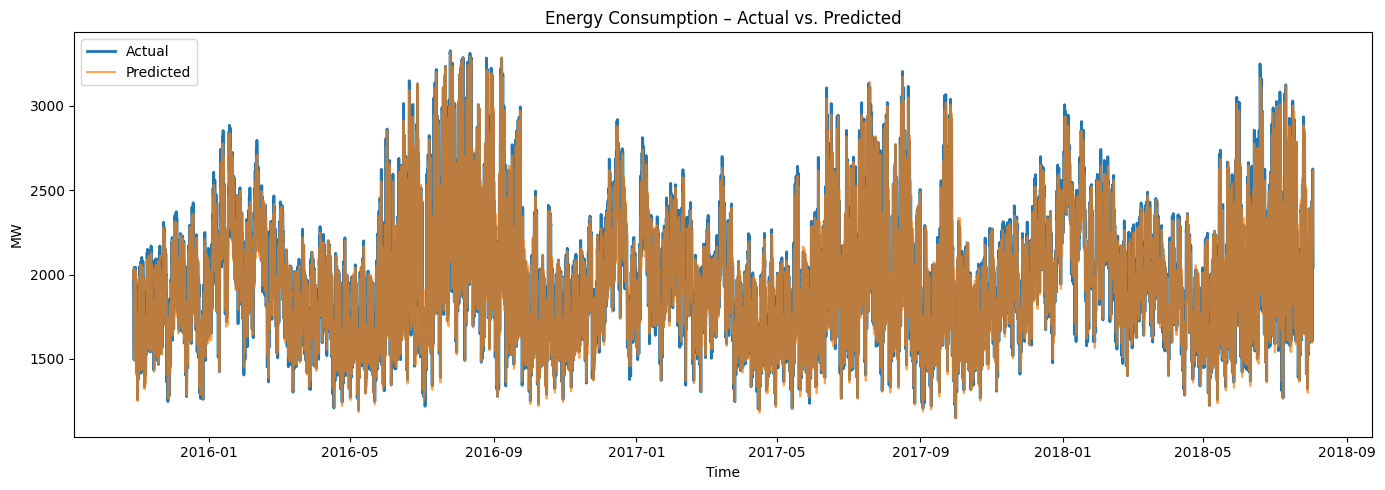

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred_lr, label='Predicted', alpha=0.7)
plt.title("Energy Consumption – Actual vs. Predicted")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score: ", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 25.796619351706997
R2 Score:  0.9952902067685235


### Model Interpretation, Forecast Horizon, and Production Strategy

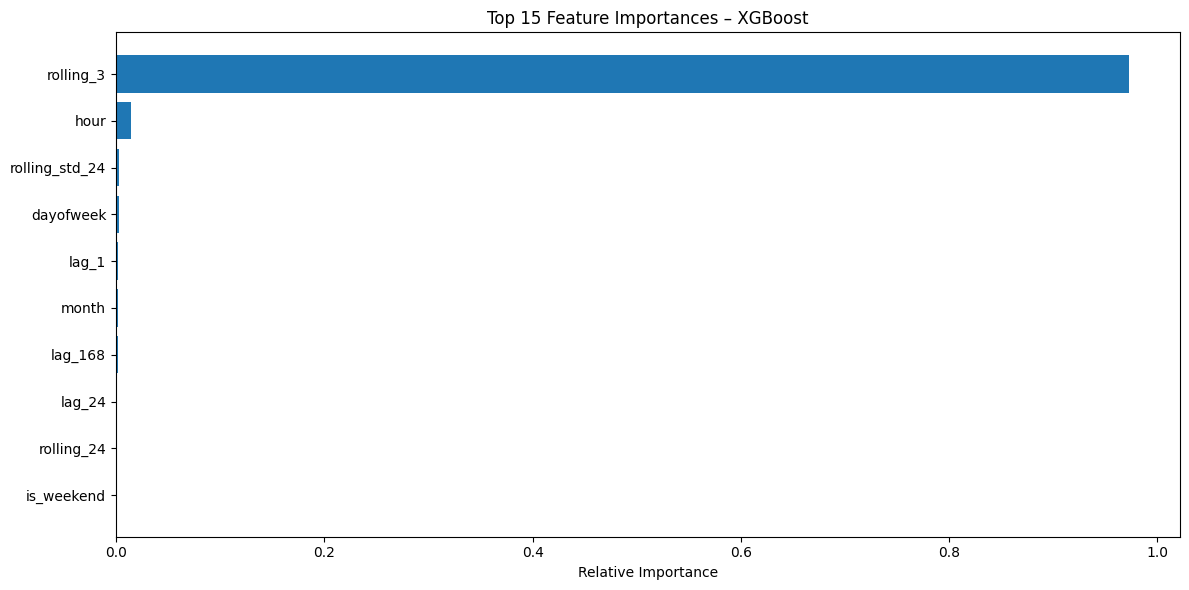

In [64]:
# Get importances
importances = xgb.feature_importances_
feature_names = X_train.columns

# Build a Dataframe
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(12, 6))
plt.barh(feat_imp['Feature'][:15], feat_imp['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – XGBoost")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [66]:
import pickle

# Save the model
with open('models/xgb_energy_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)